## Inversion Española en México vs Inversión Extranjera Directa de México

Analizar si hay correlacion entre las variables de la inversion Extranjera Directa y la inversion de empresas españolas en México

https://www.cienciadedatos.net/documentos/pystats05-correlacion-lineal-python.html

In [17]:
!pip install pingouin

     |████████████████████████████████| 205 kB 7.2 MB/s 
     |████████████████████████████████| 9.9 MB 8.1 MB/s 
     |████████████████████████████████| 27.4 MB 21.9 MB/s 
     |████████████████████████████████| 807 kB 56.3 MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.12-py3-none-any.whl size=204286 sha256=dc31c80111080e7b9f4113bc1e09b32dba6559ec4b902c40c231049d6da28e82
  Stored in directory: /home/dsc/.cache/pip/wheels/5b/8a/ed/fafe2714a0f047d64fb582105b174b5e5218c82a0d787bbec4
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=49152409e9c4db921ce620635261c48a7afbcb2934c801400b4105f1e2402018
  Stored in directory: /home/dsc/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: pandas
    Found existing installation: pandas 0.23.4
    Uninstalling pandas-0.23.4:
      Successfully uninstalled pandas-0.23.4
  Attempting uninstall: scipy
    Fou

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
import statsmodels.api as sm
import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler



# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [15]:
%store -r df_var_clean

In [16]:
df_vs = df_var_clean[['Inversion Es(millones€)', 'IED(millones€)']]

In [17]:
df_vs.head()

variables,Inversion Es(millones€),IED(millones€)
1993,-0.560555,-1.803527
1994,-0.631052,-1.258032
1997,-0.561268,-0.934076
1998,-0.587294,-1.027913
1999,-0.553466,-0.698499


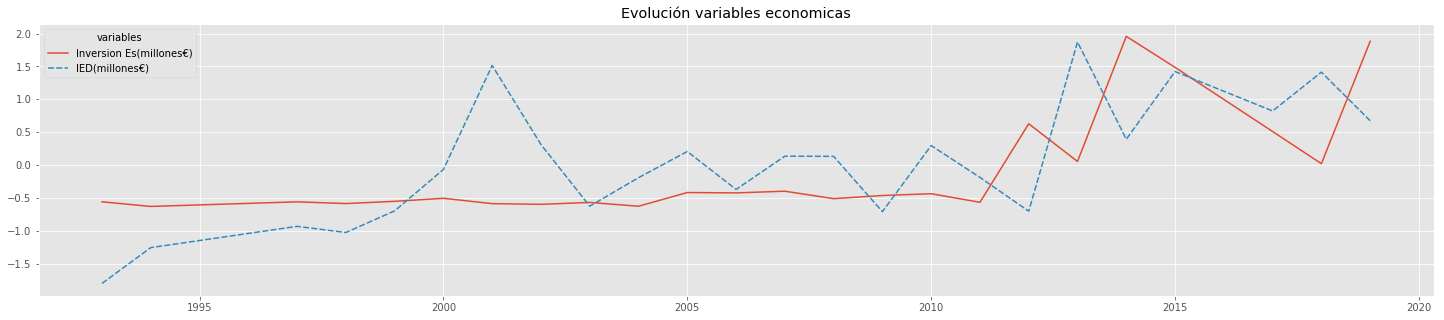

In [18]:
plt.figure(figsize=(25,5))
sns.lineplot(data=df_vs)
plt.title('Evolución variables economicas')
plt.show()

In [19]:
df_vs['%inv_ES'] = df_vs['Inversion Es(millones€)']/df_vs['IED(millones€)']*100

In [20]:
df_vs.head()

variables,Inversion Es(millones€),IED(millones€),%inv_ES
1993,-0.560555,-1.803527,31.081026
1994,-0.631052,-1.258032,50.161847
1997,-0.561268,-0.934076,60.088042
1998,-0.587294,-1.027913,57.134587
1999,-0.553466,-0.698499,79.236502


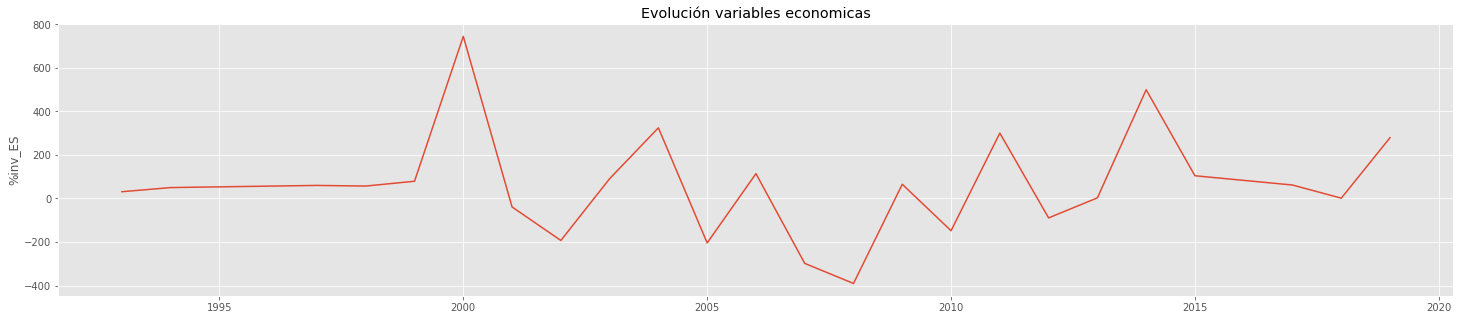

In [21]:
plt.figure(figsize=(25,5))
sns.lineplot(data=df_vs['%inv_ES'])
plt.title('Evolución variables economicas')
plt.show()

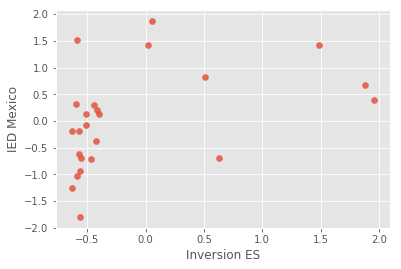

In [22]:
# Gráfico 
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=df_vs['Inversion Es(millones€)'], y=df_vs['IED(millones€)'], alpha= 0.8)
ax.set_xlabel('Inversion ES')
ax.set_ylabel('IED Mexico');

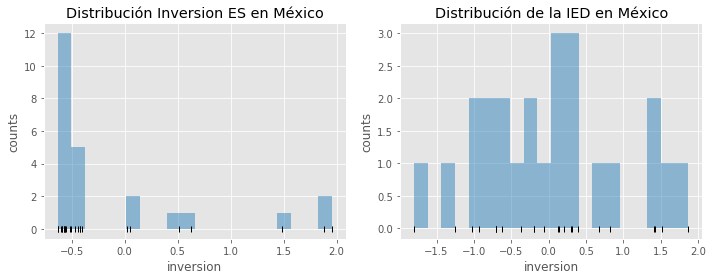

In [23]:
# Gráfico distribución variables
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].hist(x=df_vs['Inversion Es(millones€)'], bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(df_vs['Inversion Es(millones€)'], np.full_like(df_vs['Inversion Es(millones€)'], -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución Inversion ES en México')
axs[0].set_xlabel('inversion')
axs[0].set_ylabel('counts')

axs[1].hist(x=df_vs['IED(millones€)'], bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(df_vs['IED(millones€)'], np.full_like(df_vs['IED(millones€)'], -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución de la IED en México')
axs[1].set_xlabel('inversion')
axs[1].set_ylabel('counts')


plt.tight_layout();

In [24]:
# Cálculo de correlación 
# ==============================================================================
print('Correlación Pearson: ', df_vs['Inversion Es(millones€)'].corr(df_vs['IED(millones€)'], method='pearson'))
print('Correlación spearman: ', df_vs['Inversion Es(millones€)'].corr(df_vs['IED(millones€)'], method='spearman'))
print('Correlación kendall: ', df_vs['Inversion Es(millones€)'].corr(df_vs['IED(millones€)'], method='kendall'))

Correlación Pearson:  0.42306641919836047
Correlación spearman:  0.49391304347826087
Correlación kendall:  0.3695652173913043


In [25]:
# Cálculo de correlación, significancia e intervalos con pingouin
# ==============================================================================
display(pg.corr(df_vs['Inversion Es(millones€)'], df_vs['IED(millones€)'], method='pearson'))
display(pg.corr(df_vs['Inversion Es(millones€)'], df_vs['IED(millones€)'], method='spearman'))
display(pg.corr(df_vs['Inversion Es(millones€)'], df_vs['IED(millones€)'], method='kendall'))

,n,r,CI95%,p-val,BF10,power
pearson,24,0.423066,"[0.02, 0.71]",0.039416,1.878,0.557839


,n,r,CI95%,p-val,power
spearman,24,0.493913,"[0.11, 0.75]",0.014166,0.713632


,n,r,CI95%,p-val,power
kendall,24,0.369565,"[-0.04, 0.67]",0.011109,0.440107
